<a href="https://colab.research.google.com/github/blackexchange/MVAvaliacao/blob/master/Criando_Mapa_Eleicoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas fiona shapely pyproj rtree geopandas -q

     |████████████████████████████████| 16.7 MB 712 kB/s 
     |████████████████████████████████| 6.3 MB 54.2 MB/s 
     |████████████████████████████████| 1.0 MB 55.6 MB/s 
     |████████████████████████████████| 1.0 MB 58.3 MB/s 


In [ ]:
!pip install tabula-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 18.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount ("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from tabula.io import read_pdf

In [ ]:
 df = read_pdf("/content/gdrive/MyDrive/Datasets/TRE-BA-locais-de-votacao-interior-com-secoes-e-aptos-eleicoes-2022.pdf",encoding='utf-8', pages="all")

Nov 14, 2022 1:47:22 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Nov 14, 2022 1:47:22 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>



In [ ]:
import pandas as pd;

In [ ]:
df2 = pd.concat(df);

In [ ]:
df2.head()

,ZONA,NOM_LOCALIDADE,NOM_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP,NÚMERO DAS SEÇÕES,QTDE. DE\rSEÇÕES,APTOS
0,21,ACAJUTIBA,CNEC,PRAÇA RUI BARBOSA - ZONA URBANA,CENTRO,48360000,"85,86,90,91,99,100",6,1607.0
1,21,ACAJUTIBA,COLEGIO MUNICIPAL JOSE RAMOS DE ARAUJO,"RUA J J SEABRA, S/N - ZONA URBANA",CENTRO,48360000,"87,88,89",3,706.0
2,21,ACAJUTIBA,PREDIO RURAL PROFESSORA MARIA ESPERANCA,"RUA SEVERINO VIEIRA, S/N - ZONA URBANA",CENTRO,48360000,"94,95,96,97,98",5,1642.0
3,21,ACAJUTIBA,ESCOLA PROFESSOR CARLOS BARROS,RUA SOUZA BRITO - ZONA URBANA,CENTRO,48360000,"101,102,190",3,1109.0
4,21,ACAJUTIBA,COLEGIO DO TIJUCO,RUA DO TIJUCO - ZONA URBANA,CENTRO,48360000,"103,104",2,795.0


In [ ]:
# Renomear coluna
df_interior = df2.rename(columns={"NOM_LOCALIDADE": "MUNICÍPIO", "NOM_LOCAL": "NOME_LOCAL"})

In [ ]:
 df_capital = read_pdf("/content/gdrive/MyDrive/Datasets/TRE-BA-locais-de-votacao-salvador-com-secoes-e-aptos-eleicoes-2022.pdf",encoding='utf-8', pages="all")

In [ ]:
df_capital = pd.concat(df_capital);

In [ ]:
df_capital.head()

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP,NÚMERO_DAS_SEÇÕES,SEÇÕES,APTOS
0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080,"40,41,272,275,320",5,2202
1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040,"61,70,71,72,73,74",6,2071
2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150,"42,43,44,45,75,76,77,78,92,93,94,95,96,103,123...",21,6584
3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904,"11,12,13,14,15,16,80,81,82,83,84,220,221",13,3987
4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150,"24,35,36,37,38,89,90,91",8,2695


In [ ]:
df_interior.head()

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP,NÚMERO DAS SEÇÕES,QTDE. DE\rSEÇÕES,APTOS
0,21,ACAJUTIBA,CNEC,PRAÇA RUI BARBOSA - ZONA URBANA,CENTRO,48360000,"85,86,90,91,99,100",6,1607.0
1,21,ACAJUTIBA,COLEGIO MUNICIPAL JOSE RAMOS DE ARAUJO,"RUA J J SEABRA, S/N - ZONA URBANA",CENTRO,48360000,"87,88,89",3,706.0
2,21,ACAJUTIBA,PREDIO RURAL PROFESSORA MARIA ESPERANCA,"RUA SEVERINO VIEIRA, S/N - ZONA URBANA",CENTRO,48360000,"94,95,96,97,98",5,1642.0
3,21,ACAJUTIBA,ESCOLA PROFESSOR CARLOS BARROS,RUA SOUZA BRITO - ZONA URBANA,CENTRO,48360000,"101,102,190",3,1109.0
4,21,ACAJUTIBA,COLEGIO DO TIJUCO,RUA DO TIJUCO - ZONA URBANA,CENTRO,48360000,"103,104",2,795.0


In [ ]:
df_interior = df_interior.iloc[:,0:6]

In [ ]:
df_capital = df_capital.iloc[:,0:6]

In [ ]:
df_all = df_capital.append(df_interior)

In [ ]:
df_all.shape

(9137, 6)

In [ ]:
df_all.head()

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150


In [ ]:
!pip install geopy -q

In [ ]:
import geopandas as gpd
import numpy as np
from geopandas.tools import geocode

In [ ]:
pontos = geocode(df_all['CEP'],provider="nominatim", timeout=None, user_agent='my_app')

In [ ]:
pontos


,geometry,address
0,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed..."
1,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed..."
2,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed..."
3,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed..."
4,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed..."
...,...,...
78,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed..."
79,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed..."
80,GEOMETRYCOLLECTION EMPTY,None
81,GEOMETRYCOLLECTION EMPTY,None


In [ ]:
pontos.shape

(83, 2)

In [ ]:
df_all.shape

(9137, 6)

In [ ]:
comb = pontos.merge(df_all,left_index=True, right_index=True)

In [ ]:
comb.head()

,geometry,address,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed...",1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
0,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed...",4,SALVADOR,ESCOLA MUNICIPAL DARCY RIBEIRO,CONJUNTO RECANTO DA LAGOA RUA 6 - ZONA URBANA,FAZENDA COUTOS,40730630
0,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed...",7,SALVADOR,COLÉGIO ESTADUAL BRIGADEIRO EDUARDO GOMES,RUA SAO GERALDO N° 24 - MATATU - ZONA URBANA,MATATU,40255315
0,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed...",11,SALVADOR,ESCOLA ESTADUAL RAIMUNDO DE ALMEIDA GOUVEIA,"RUA A, S/N, 2A ETAPA DE CASTELO BRANCO - ZONA ...",CASTELO BRANCO (2A ETAPA),41320010
0,POINT (-45.84850 -12.16354),"Luís Eduardo Magalhães, Região Geográfica Imed...",14,SALVADOR,ESCOLA MUNICIPAL MANOEL DE ABREU,"RUA SÃO MARCOS, S/N - ZONA URBANA",SÃO MARCOS,41630160


In [ ]:
rem = comb[comb['geometry'].is_empty]

In [ ]:
rem

,geometry,address,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
30,GEOMETRYCOLLECTION EMPTY,None,2,SALVADOR,UNIVERSIDADE CATÓLICA DO SALVADOR (UCSAL),"AVENIDA CARDEAL DA SILVA, 205 - ZONA URBANA",FEDERAÇÃO,40231250
30,GEOMETRYCOLLECTION EMPTY,None,5,SALVADOR,ESCOLA SANTA EDWIRGENS - ANEXO,"R PAULO HÉLIO DE CARVALHO, 29, ATRÁS DA IGREJA...",MATA ESCURA,41219065
30,GEOMETRYCOLLECTION EMPTY,None,8,SALVADOR,ESCOLA MUNICIPAL FILHOS DE SALOMÃO,"ESTRADA DE CAMPINAS, S/N - ZONA URBANA",CAMPINAS,40271140
30,GEOMETRYCOLLECTION EMPTY,None,12,SALVADOR,ESCOLA ESTADUAL MARECHAL MASCARENHAS DE MORAES,"AV. DORIVAL CAYMMI, S/N - VILA DOS EX-COMBATEN...",ITAPUÃ,41635151
30,GEOMETRYCOLLECTION EMPTY,None,15,SALVADOR,COLÉGIO ESTADUAL ASSIS CHATEAUBRIAND,RUA GÉRSON DE CARVALHO S/N - ZONA URBANA,SÃO CAETANO,40390040
...,...,...,...,...,...,...,...,...
81,GEOMETRYCOLLECTION EMPTY,None,17,SALVADOR,COLÉGIO ESTADUAL CLÉRISTON ANDRADE,"RUA SERGIMIRIM, S/N - ZONA URBANA",ITACARANHA,40713295
82,GEOMETRYCOLLECTION EMPTY,None,4,SALVADOR,ESCOLA MUNICIPAL ESTHER FÉLIX DA SILVA,"RUA EIXO A, S/N - ZONA URBANA",FAZENDA COUTOS,40730630
82,GEOMETRYCOLLECTION EMPTY,None,11,SALVADOR,ESCOLA ESTADUAL CONSELHEIRO VICENTE PACHECO DE...,"RUA DAS PAULINAS, S/N - FIM DE LINHA - ZONA UR...",DOM AVELAR,41315150
82,GEOMETRYCOLLECTION EMPTY,None,14,SALVADOR,ESCOLA MUNICIPAL 22 DE ABRIL,"R. BAHIA, SN - ZONA URBANA",TANCREDO NEVES,41210000


In [ ]:
df_all.tail()

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
18,205,LUÍS EDUARDO MAGALHÃES,UNIDOM - FACULDADE DOM PEDRO II,"RUA RUY BARBOSA, 750 - ZONA URBANA",CENTRO,47850000
19,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL VEREADOR LUCIR FICANHA,"RUA TEIXEIRA DE FREITAS, 1949 - ZONA URBANA",FLORAIS LEA II,47850000
20,205,LUÍS EDUARDO MAGALHÃES,COLÉGIO ESTADUAL MARIA OTÍLIA LUTZ,"RUA DOS FLAMBOYANT, QUADRA 102 - ZONA URBANA",JARDIM DAS ACÁCIAS,47850000
21,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL TIAGO ALFREDO LUPSCHISKI LIES...,"RUA A, 469 - ZONA URBANA",VISTA ALEGRE,47850000
22,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL EDALEIO BARBOSA DE SOUZA,"AVENIDA ITABUNA, 592, QD.55, LTS.08 E 09 - ZON...",SANTA CRUZ,47850000


In [ ]:
df_all.head()

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 22
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ZONA            9137 non-null   int64 
 1   MUNICÍPIO       9137 non-null   object
 2   NOME_LOCAL      9137 non-null   object
 3   ENDEREÇO_LOCAL  9137 non-null   object
 4   BAIRRO_LOCAL    9137 non-null   object
 5   CEP             9137 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 757.7+ KB


In [ ]:
df_capital

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150
...,...,...,...,...,...,...
55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130
56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030
57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100
58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025


In [ ]:
df_capital.tail()

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130
56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030
57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100
58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025
59,19,SALVADOR,ESCOLA MUNICIPAL CORAÇÃO DE MARIA,"RESIDENCIAL CORAÇÃO DE MARIA, ESTR. DAS PEDREI...",CASSANGE,41410003


In [ ]:
df_capital

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150
...,...,...,...,...,...,...
55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130
56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030
57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100
58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025


In [ ]:
df_all.max()

ZONA                                            205
MUNICÍPIO                             ÉRICO CARDOSO
NOME_LOCAL        USF ABEL CORNÉLIO DE MORAIS FILHO
ENDEREÇO_LOCAL        ÁREA INDUSTRIAL - ZONA URBANA
BAIRRO_LOCAL                        ÁREA INDUSTRIAL
CEP                                        71720075
dtype: object

In [ ]:
df_all.count()

ZONA              9137
MUNICÍPIO         9137
NOME_LOCAL        9137
ENDEREÇO_LOCAL    9137
BAIRRO_LOCAL      9137
CEP               9137
dtype: int64

In [ ]:
df_all.reindex()

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150
...,...,...,...,...,...,...
18,205,LUÍS EDUARDO MAGALHÃES,UNIDOM - FACULDADE DOM PEDRO II,"RUA RUY BARBOSA, 750 - ZONA URBANA",CENTRO,47850000
19,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL VEREADOR LUCIR FICANHA,"RUA TEIXEIRA DE FREITAS, 1949 - ZONA URBANA",FLORAIS LEA II,47850000
20,205,LUÍS EDUARDO MAGALHÃES,COLÉGIO ESTADUAL MARIA OTÍLIA LUTZ,"RUA DOS FLAMBOYANT, QUADRA 102 - ZONA URBANA",JARDIM DAS ACÁCIAS,47850000
21,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL TIAGO ALFREDO LUPSCHISKI LIES...,"RUA A, 469 - ZONA URBANA",VISTA ALEGRE,47850000


In [ ]:
df_all.tail()

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
18,205,LUÍS EDUARDO MAGALHÃES,UNIDOM - FACULDADE DOM PEDRO II,"RUA RUY BARBOSA, 750 - ZONA URBANA",CENTRO,47850000
19,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL VEREADOR LUCIR FICANHA,"RUA TEIXEIRA DE FREITAS, 1949 - ZONA URBANA",FLORAIS LEA II,47850000
20,205,LUÍS EDUARDO MAGALHÃES,COLÉGIO ESTADUAL MARIA OTÍLIA LUTZ,"RUA DOS FLAMBOYANT, QUADRA 102 - ZONA URBANA",JARDIM DAS ACÁCIAS,47850000
21,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL TIAGO ALFREDO LUPSCHISKI LIES...,"RUA A, 469 - ZONA URBANA",VISTA ALEGRE,47850000
22,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL EDALEIO BARBOSA DE SOUZA,"AVENIDA ITABUNA, 592, QD.55, LTS.08 E 09 - ZON...",SANTA CRUZ,47850000


In [ ]:
df_all2  = df_all.reset_index()

In [ ]:
df_all2.tail()

,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
9132,18,205,LUÍS EDUARDO MAGALHÃES,UNIDOM - FACULDADE DOM PEDRO II,"RUA RUY BARBOSA, 750 - ZONA URBANA",CENTRO,47850000
9133,19,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL VEREADOR LUCIR FICANHA,"RUA TEIXEIRA DE FREITAS, 1949 - ZONA URBANA",FLORAIS LEA II,47850000
9134,20,205,LUÍS EDUARDO MAGALHÃES,COLÉGIO ESTADUAL MARIA OTÍLIA LUTZ,"RUA DOS FLAMBOYANT, QUADRA 102 - ZONA URBANA",JARDIM DAS ACÁCIAS,47850000
9135,21,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL TIAGO ALFREDO LUPSCHISKI LIES...,"RUA A, 469 - ZONA URBANA",VISTA ALEGRE,47850000
9136,22,205,LUÍS EDUARDO MAGALHÃES,ESCOLA MUNICIPAL EDALEIO BARBOSA DE SOUZA,"AVENIDA ITABUNA, 592, QD.55, LTS.08 E 09 - ZON...",SANTA CRUZ,47850000


In [ ]:
df_all2.hist

<bound method hist_frame of       index  ZONA               MUNICÍPIO  \
0         0     1                SALVADOR   
1         1     1                SALVADOR   
2         2     1                SALVADOR   
3         3     1                SALVADOR   
4         4     1                SALVADOR   
...     ...   ...                     ...   
9132     18   205  LUÍS EDUARDO MAGALHÃES   
9133     19   205  LUÍS EDUARDO MAGALHÃES   
9134     20   205  LUÍS EDUARDO MAGALHÃES   
9135     21   205  LUÍS EDUARDO MAGALHÃES   
9136     22   205  LUÍS EDUARDO MAGALHÃES   

                                             NOME_LOCAL  \
0                                       CABANA DA BARRA   
1                      BAHIA BRITSH CLUB (CLUBE INGLÊS)   
2               COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES   
3                    PAVILHÃO DE AULAS DO CANELA - UFBA   
4                                 ESCOLA DE BELAS ARTES   
...                                                 ...   
9132              

In [ ]:
df_all2[9000]

KeyError: ignored

In [ ]:
df_capital

,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150
...,...,...,...,...,...,...
55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130
56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030
57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100
58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025


In [ ]:
df_capital = df_capital.reset_index()

In [ ]:
df_capital

,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150
...,...,...,...,...,...,...,...
469,55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130
470,56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030
471,57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100
472,58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025


In [ ]:
pontos = geocode(df_capital['CEP'],provider="nominatim", timeout=None, user_agent='my_app')

In [ ]:
pontos

,geometry,address
0,POINT (-38.52678 -13.00820),"Barra, Salvador, Região Geográfica Imediata de..."
1,GEOMETRYCOLLECTION EMPTY,None
2,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d..."
3,GEOMETRYCOLLECTION EMPTY,None
4,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d..."
...,...,...
469,GEOMETRYCOLLECTION EMPTY,None
470,GEOMETRYCOLLECTION EMPTY,None
471,GEOMETRYCOLLECTION EMPTY,None
472,GEOMETRYCOLLECTION EMPTY,None


In [ ]:
comb = pontos.merge(df_capital, left_index=True, right_index=True)

In [ ]:
comb

,geometry,address,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,POINT (-38.52678 -13.00820),"Barra, Salvador, Região Geográfica Imediata de...",0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,GEOMETRYCOLLECTION EMPTY,None,1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d...",2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,GEOMETRYCOLLECTION EMPTY,None,3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d...",4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150
...,...,...,...,...,...,...,...,...,...
469,GEOMETRYCOLLECTION EMPTY,None,55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130
470,GEOMETRYCOLLECTION EMPTY,None,56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030
471,GEOMETRYCOLLECTION EMPTY,None,57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100
472,GEOMETRYCOLLECTION EMPTY,None,58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025


In [ ]:
rem = comb[comb.geometry.is_empty]

In [ ]:
rem['ende']=rem['NOME_LOCAL'] +', '+rem['MUNICÍPIO']

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
rem

,geometry,address,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP,ende
1,GEOMETRYCOLLECTION EMPTY,None,1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040,"BAHIA BRITSH CLUB (CLUBE INGLÊS), SALVADOR"
3,GEOMETRYCOLLECTION EMPTY,None,3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904,"PAVILHÃO DE AULAS DO CANELA - UFBA, SALVADOR"
6,GEOMETRYCOLLECTION EMPTY,None,6,1,SALVADOR,FACULDADE DE EDUCAÇÃO DA UFBA,"RUA REITOR MIGUEL CALMON, S/N - ZONA URBANA",CANELA,40110904,"FACULDADE DE EDUCAÇÃO DA UFBA, SALVADOR"
7,GEOMETRYCOLLECTION EMPTY,None,7,1,SALVADOR,ESCOLA SANTA TEREZINHA,"RUA DEOCLECIANO, N 09 - ZONA URBANA",CHAME-CHAME,40150400,"ESCOLA SANTA TEREZINHA, SALVADOR"
9,GEOMETRYCOLLECTION EMPTY,None,9,1,SALVADOR,ASSOCIAÇÃO CIVIL CASA D'ITÁLIA,AV. SETE DE SETEMBRO 1238 - ZONA URBANA,CAMPO GRANDE,40080121,"ASSOCIAÇÃO CIVIL CASA D'ITÁLIA, SALVADOR"
...,...,...,...,...,...,...,...,...,...,...
469,GEOMETRYCOLLECTION EMPTY,None,55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130,"ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO, SAL..."
470,GEOMETRYCOLLECTION EMPTY,None,56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030,"ESCOLA MUNICIPAL DE CAJAZEIRAS XI, SALVADOR"
471,GEOMETRYCOLLECTION EMPTY,None,57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100,"COLÉGIO ESTADUAL DONA MORA GUIMARÃES, SALVADOR"
472,GEOMETRYCOLLECTION EMPTY,None,58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025,"COLÉGIO ESTADUAL DE NOVA ESPERANÇA, SALVADOR"


In [ ]:
pontos = geocode(rem['ende'],provider="nominatim", timeout=None, user_agent='my_app')

In [ ]:
pontos

,geometry,address
1,GEOMETRYCOLLECTION EMPTY,None
3,GEOMETRYCOLLECTION EMPTY,None
6,POINT (-38.51935 -12.99560),"Faculdade de Educação da UFBA, Avenida Reitor ..."
7,POINT (-38.40718 -12.11870),"Escola Comunitária Nova Esperança, 708, Rua Sã..."
9,GEOMETRYCOLLECTION EMPTY,None
...,...,...
469,GEOMETRYCOLLECTION EMPTY,None
470,GEOMETRYCOLLECTION EMPTY,None
471,GEOMETRYCOLLECTION EMPTY,None
472,POINT (-38.37764 -12.83422),"Colégio Estadual de Nova Esperança, Estrada CI..."


In [ ]:
rem

,geometry,address,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP,ende
1,GEOMETRYCOLLECTION EMPTY,None,1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040,"BAHIA BRITSH CLUB (CLUBE INGLÊS), SALVADOR"
3,GEOMETRYCOLLECTION EMPTY,None,3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904,"PAVILHÃO DE AULAS DO CANELA - UFBA, SALVADOR"
6,GEOMETRYCOLLECTION EMPTY,None,6,1,SALVADOR,FACULDADE DE EDUCAÇÃO DA UFBA,"RUA REITOR MIGUEL CALMON, S/N - ZONA URBANA",CANELA,40110904,"FACULDADE DE EDUCAÇÃO DA UFBA, SALVADOR"
7,GEOMETRYCOLLECTION EMPTY,None,7,1,SALVADOR,ESCOLA SANTA TEREZINHA,"RUA DEOCLECIANO, N 09 - ZONA URBANA",CHAME-CHAME,40150400,"ESCOLA SANTA TEREZINHA, SALVADOR"
9,GEOMETRYCOLLECTION EMPTY,None,9,1,SALVADOR,ASSOCIAÇÃO CIVIL CASA D'ITÁLIA,AV. SETE DE SETEMBRO 1238 - ZONA URBANA,CAMPO GRANDE,40080121,"ASSOCIAÇÃO CIVIL CASA D'ITÁLIA, SALVADOR"
...,...,...,...,...,...,...,...,...,...,...
469,GEOMETRYCOLLECTION EMPTY,None,55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130,"ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO, SAL..."
470,GEOMETRYCOLLECTION EMPTY,None,56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030,"ESCOLA MUNICIPAL DE CAJAZEIRAS XI, SALVADOR"
471,GEOMETRYCOLLECTION EMPTY,None,57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100,"COLÉGIO ESTADUAL DONA MORA GUIMARÃES, SALVADOR"
472,GEOMETRYCOLLECTION EMPTY,None,58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025,"COLÉGIO ESTADUAL DE NOVA ESPERANÇA, SALVADOR"


In [ ]:
rem = rem.iloc[ :,1:]

In [ ]:
comb_rem = pontos.merge(rem,left_index=True, right_index=True)

In [ ]:
comb_rem

,geometry,address_x,address_y,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP,ende
1,GEOMETRYCOLLECTION EMPTY,None,None,1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040,"BAHIA BRITSH CLUB (CLUBE INGLÊS), SALVADOR"
3,GEOMETRYCOLLECTION EMPTY,None,None,3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904,"PAVILHÃO DE AULAS DO CANELA - UFBA, SALVADOR"
6,POINT (-38.51935 -12.99560),"Faculdade de Educação da UFBA, Avenida Reitor ...",None,6,1,SALVADOR,FACULDADE DE EDUCAÇÃO DA UFBA,"RUA REITOR MIGUEL CALMON, S/N - ZONA URBANA",CANELA,40110904,"FACULDADE DE EDUCAÇÃO DA UFBA, SALVADOR"
7,POINT (-38.40718 -12.11870),"Escola Comunitária Nova Esperança, 708, Rua Sã...",None,7,1,SALVADOR,ESCOLA SANTA TEREZINHA,"RUA DEOCLECIANO, N 09 - ZONA URBANA",CHAME-CHAME,40150400,"ESCOLA SANTA TEREZINHA, SALVADOR"
9,GEOMETRYCOLLECTION EMPTY,None,None,9,1,SALVADOR,ASSOCIAÇÃO CIVIL CASA D'ITÁLIA,AV. SETE DE SETEMBRO 1238 - ZONA URBANA,CAMPO GRANDE,40080121,"ASSOCIAÇÃO CIVIL CASA D'ITÁLIA, SALVADOR"
...,...,...,...,...,...,...,...,...,...,...,...
469,GEOMETRYCOLLECTION EMPTY,None,None,55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130,"ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO, SAL..."
470,GEOMETRYCOLLECTION EMPTY,None,None,56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030,"ESCOLA MUNICIPAL DE CAJAZEIRAS XI, SALVADOR"
471,GEOMETRYCOLLECTION EMPTY,None,None,57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100,"COLÉGIO ESTADUAL DONA MORA GUIMARÃES, SALVADOR"
472,POINT (-38.37764 -12.83422),"Colégio Estadual de Nova Esperança, Estrada CI...",None,58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025,"COLÉGIO ESTADUAL DE NOVA ESPERANÇA, SALVADOR"


In [ ]:
comb_rem = comb_rem[~comb_rem.geometry.is_empty]

In [ ]:
comb_rem

,geometry,address_x,address_y,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP,ende
6,POINT (-38.51935 -12.99560),"Faculdade de Educação da UFBA, Avenida Reitor ...",None,6,1,SALVADOR,FACULDADE DE EDUCAÇÃO DA UFBA,"RUA REITOR MIGUEL CALMON, S/N - ZONA URBANA",CANELA,40110904,"FACULDADE DE EDUCAÇÃO DA UFBA, SALVADOR"
7,POINT (-38.40718 -12.11870),"Escola Comunitária Nova Esperança, 708, Rua Sã...",None,7,1,SALVADOR,ESCOLA SANTA TEREZINHA,"RUA DEOCLECIANO, N 09 - ZONA URBANA",CHAME-CHAME,40150400,"ESCOLA SANTA TEREZINHA, SALVADOR"
18,POINT (-38.44946 -12.99748),"Colégio Estadual Thales de Azevedo, Rua Adelai...",None,18,1,SALVADOR,ESCOLA ESTADUAL AZEVEDO FERNANDES,"LARGO DO PELOURINHO, 11 - ZONA URBANA",PELOURINHO,40026280,"ESCOLA ESTADUAL AZEVEDO FERNANDES, SALVADOR"
20,POINT (-38.09751 -12.64925),"Colegio Estudual de Monte Gordo, Estrada Velha...",None,20,1,SALVADOR,COLÉGIO DE SÃO BENTO,"RUA DO PARAISO, 149 - ZONA URBANA",SÃO PEDRO,40040000,"COLÉGIO DE SÃO BENTO, SALVADOR"
24,POINT (-38.48749 -13.01307),"Escola Oswaldo Cruz, Rua Basílio de Magalhães,...",None,24,2,SALVADOR,ESCOLA OSWALDO CRUZ,"RUA DO MEIO, N 13 - ZONA URBANA",RIO VERMELHO,41940426,"ESCOLA OSWALDO CRUZ, SALVADOR"
...,...,...,...,...,...,...,...,...,...,...,...
446,POINT (-38.46084 -12.96632),"Colégio Estadual Ministro Aliomar Baleeiro, Ru...",None,32,19,SALVADOR,ESCOLA ESTADUAL RAUL SÁ,"RUA C, SETOR C, S/N - ZONA URBANA",MUSSURUNGA I,41490000,"ESCOLA ESTADUAL RAUL SÁ, SALVADOR"
450,POINT (-38.35375 -12.88949),"Escola Municipal 2 de Julho, Rua São Cristóvão...",None,36,19,SALVADOR,ESCOLA MUNICIPAL 2 DE JULHO,"RUA AYMORÉ MOREIRA, N 9999- ZONA URBANA",TROBOGY,41745038,"ESCOLA MUNICIPAL 2 DE JULHO, SALVADOR"
456,POINT (-38.40641 -12.90472),"Colégio Estadual Eduardo Bahiana, Rua B-03 - J...",None,42,19,SALVADOR,COLÉGIO ESTADUAL EDUARDO BAHIANA,"EST. DO COQUEIRO GRANDE, FAZENDA GRANDE II - Z...",CAJAZEIRAS,41343855,"COLÉGIO ESTADUAL EDUARDO BAHIANA, SALVADOR"
458,POINT (-40.59308 -19.15630),"EUM Córrego Negro, Rua São Salvador, Centro, S...",None,44,19,SALVADOR,ESCOLA MUNICIPAL CRISTO REI,"VIA COLETORA B, FAZENDA GRANDE II, S/N - ZONA ...",BOCA DA MATA,41340140,"ESCOLA MUNICIPAL CRISTO REI, SALVADOR"


In [ ]:
comb

,geometry,address,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,POINT (-38.52678 -13.00820),"Barra, Salvador, Região Geográfica Imediata de...",0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
1,GEOMETRYCOLLECTION EMPTY,None,1,1,SALVADOR,BAHIA BRITSH CLUB (CLUBE INGLÊS),RUA BANCO DOS INGLESES 20 - ZONA URBANA,CAMPO GRANDE,40080040
2,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d...",2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
3,GEOMETRYCOLLECTION EMPTY,None,3,1,SALVADOR,PAVILHÃO DE AULAS DO CANELA - UFBA,"RUA REITOR MIGUEL CALMON, S/N- ZONA URBANA",CANELA,40110904
4,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d...",4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150
...,...,...,...,...,...,...,...,...,...
469,GEOMETRYCOLLECTION EMPTY,None,55,19,SALVADOR,ESCOLA MUNICIPAL MARIA ANTONIETA ALFARANO,"LARGO DO CABO VERDE, S/N - ZONA URBANA",CAJAZEIRAS XI,41245130
470,GEOMETRYCOLLECTION EMPTY,None,56,19,SALVADOR,ESCOLA MUNICIPAL DE CAJAZEIRAS XI,"RUA JORNALISTA JOSÉ CURVELLO, 419 (RETORNO DO ...",CAJAZEIRAS XI,41330030
471,GEOMETRYCOLLECTION EMPTY,None,57,19,SALVADOR,COLÉGIO ESTADUAL DONA MORA GUIMARÃES,"RUA C, QUADRA C, SETOR 2, FAZENDA GRANDE I - Z...",CAJAZEIRAS,41340100
472,GEOMETRYCOLLECTION EMPTY,None,58,19,SALVADOR,COLÉGIO ESTADUAL DE NOVA ESPERANÇA,"RUA VITÓRIA DA CEASA, S/N - ZONA URBANA",CEASA,41400025


In [ ]:
comb = comb[~comb.geometry.is_empty]

In [ ]:
comb

,geometry,address,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP
0,POINT (-38.52678 -13.00820),"Barra, Salvador, Região Geográfica Imediata de...",0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080
2,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d...",2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150
4,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d...",4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150
5,POINT (-38.48733 -12.99986),"Horto Florestal, Salvador, Região Geográfica I...",5,1,SALVADOR,FACULDADE DE DIREITO DA UFBA,RUA DA PAZ S/N - ZONA URBANA,GRAÇA,40150140
8,POINT (-38.52165 -12.99517),"Canela, Salvador, Região Geográfica Imediata d...",8,1,SALVADOR,ESCOLA DE ADMINISTRAÇÃO DA UFBA,"RUA REITOR MIGUEL CALMON, S/No - ZONA URBANA",CANELA,40110100
...,...,...,...,...,...,...,...,...,...
389,POINT (-38.46624 -12.96519),"Salvador, Região Geográfica Imediata de Salvad...",58,16,SALVADOR,ESCOLA MUNICIPAL TOMAZ GONZAGA,"RUA TOMAZ GONZAGA, S/N - ZONA URBANA",PERNAMBUÉS,41100000
391,POINT (-38.46624 -12.96519),"Salvador, Região Geográfica Imediata de Salvad...",60,16,SALVADOR,CENTRO SOCIAL URBANO DOS PERNAMBUÉS,"RUA THOMAZ GONZAGA, S/N - ZONA URBANA",PERNAMBUÉS,41100000
435,POINT (-38.49916 -12.95796),"Lapinha, Salvador, Região Geográfica Imediata ...",21,18,SALVADOR,CONVENTO NOSSA SENHORA DA SOLEDADE,RUA AUGUSTO GUIMARÃES 736 - ZONA URBANA,SOLEDADE,40325036
453,POINT (-38.51343 -12.97024),"Comércio, Salvador, Região Geográfica Imediata...",39,19,SALVADOR,COLÉGIO ESTADUAL VERA LUX,"RUA NELSON LACERDA KM 7,5 S/N - ZONA URBANA",NOVA BRASÍLIA,40010000


In [ ]:
comb = comb.append(comb_rem)

In [ ]:
comb.shape

(169, 12)

In [ ]:
comb

,geometry,address,index,ZONA,MUNICÍPIO,NOME_LOCAL,ENDEREÇO_LOCAL,BAIRRO_LOCAL,CEP,address_x,address_y,ende
0,POINT (-38.52678 -13.00820),"Barra, Salvador, Região Geográfica Imediata de...",0,1,SALVADOR,CABANA DA BARRA,AV. AFONSO CELSO 1 - ZONA URBANA,BARRA,40140080,NaN,NaN,NaN
2,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d...",2,1,SALVADOR,COLÉGIO ESTADUAL DEPUTADO MANOEL NOVAES,"AV. ARAÚJO PINHO, 30 - ZONA URBANA",CANELA,40110150,NaN,NaN,NaN
4,POINT (-38.52171 -12.99195),"Canela, Salvador, Região Geográfica Imediata d...",4,1,SALVADOR,ESCOLA DE BELAS ARTES,AV. ARAÚJO PINHO 212 - ZONA URBANA,CANELA,40110150,NaN,NaN,NaN
5,POINT (-38.48733 -12.99986),"Horto Florestal, Salvador, Região Geográfica I...",5,1,SALVADOR,FACULDADE DE DIREITO DA UFBA,RUA DA PAZ S/N - ZONA URBANA,GRAÇA,40150140,NaN,NaN,NaN
8,POINT (-38.52165 -12.99517),"Canela, Salvador, Região Geográfica Imediata d...",8,1,SALVADOR,ESCOLA DE ADMINISTRAÇÃO DA UFBA,"RUA REITOR MIGUEL CALMON, S/No - ZONA URBANA",CANELA,40110100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
446,POINT (-38.46084 -12.96632),NaN,32,19,SALVADOR,ESCOLA ESTADUAL RAUL SÁ,"RUA C, SETOR C, S/N - ZONA URBANA",MUSSURUNGA I,41490000,"Colégio Estadual Ministro Aliomar Baleeiro, Ru...",None,"ESCOLA ESTADUAL RAUL SÁ, SALVADOR"
450,POINT (-38.35375 -12.88949),NaN,36,19,SALVADOR,ESCOLA MUNICIPAL 2 DE JULHO,"RUA AYMORÉ MOREIRA, N 9999- ZONA URBANA",TROBOGY,41745038,"Escola Municipal 2 de Julho, Rua São Cristóvão...",None,"ESCOLA MUNICIPAL 2 DE JULHO, SALVADOR"
456,POINT (-38.40641 -12.90472),NaN,42,19,SALVADOR,COLÉGIO ESTADUAL EDUARDO BAHIANA,"EST. DO COQUEIRO GRANDE, FAZENDA GRANDE II - Z...",CAJAZEIRAS,41343855,"Colégio Estadual Eduardo Bahiana, Rua B-03 - J...",None,"COLÉGIO ESTADUAL EDUARDO BAHIANA, SALVADOR"
458,POINT (-40.59308 -19.15630),NaN,44,19,SALVADOR,ESCOLA MUNICIPAL CRISTO REI,"VIA COLETORA B, FAZENDA GRANDE II, S/N - ZONA ...",BOCA DA MATA,41340140,"EUM Córrego Negro, Rua São Salvador, Centro, S...",None,"ESCOLA MUNICIPAL CRISTO REI, SALVADOR"


In [ ]:
len(pd.unique(comb['ZONA']))

19

In [ ]:
limites = gpd.read_file('/content/gdrive/MyDrive/Colab Notebooks/lml_municipio_a.shp')

In [ ]:
limites = limites[limites['nome']=='Salvador']

In [ ]:
limites

,nome,geometriaa,geocodigo,anoderefer,geometry
3817,Salvador,Não,2927408,None,"POLYGON ((-38.37922 -12.82276, -38.37713 -12.8..."


In [ ]:
!pip install geoVoronoi -q

In [ ]:
from geovoronoi import voronoi_regions_from_coords

In [ ]:
area_shape =limites.iloc[0].geometry

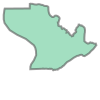

In [ ]:
area_shape

In [ ]:
 comb_sel = comb[comb.within(area_shape)==True]

In [ ]:
comb_sel.shape

(142, 12)

In [ ]:
comb.shape

(169, 12)

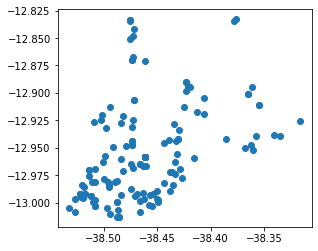

In [ ]:
comb_sel.plot()

In [ ]:
region_polys, region_pts = voronoi_regions_from_coords(comb_sel.geometry, area_shape)

In [ ]:
df_voronoi = pd.DataFrame.from_dict(region_polys, orient='index').reset_index()

In [ ]:
df_voronoi

,index,0
0,0,POLYGON ((-38.33351317732252 -12.9217712911627...
1,1,POLYGON ((-38.33351317732252 -12.9217712911627...
2,2,POLYGON ((-38.35293694497975 -12.8562075143763...
3,3,POLYGON ((-38.38174265341684 -12.8290402176951...
4,4,POLYGON ((-38.453476981443565 -12.999071014081...
...,...,...
112,112,POLYGON ((-38.48568371988462 -12.9865716254556...
113,113,POLYGON ((-38.49259218399672 -12.9811976833439...
114,114,POLYGON ((-38.49028362033149 -12.9861701855100...
115,115,POLYGON ((-38.488915623558235 -12.988021461836...


In [ ]:
voronoi = gpd.GeoDataFrame(df_voronoi, geometry=df_voronoi[0], crs="EPSG:4326")

In [ ]:
voronoi

,index,0,geometry
0,0,POLYGON ((-38.33351317732252 -12.9217712911627...,"POLYGON ((-38.33351 -12.92177, -38.33547 -12.9..."
1,1,POLYGON ((-38.33351317732252 -12.9217712911627...,"POLYGON ((-38.33351 -12.92177, -38.32431 -12.9..."
2,2,POLYGON ((-38.35293694497975 -12.8562075143763...,"POLYGON ((-38.35294 -12.85621, -38.35295 -12.8..."
3,3,POLYGON ((-38.38174265341684 -12.8290402176951...,"POLYGON ((-38.38174 -12.82904, -38.38092 -12.8..."
4,4,POLYGON ((-38.453476981443565 -12.999071014081...,"POLYGON ((-38.45348 -12.99907, -38.44350 -12.9..."
...,...,...,...
112,112,POLYGON ((-38.48568371988462 -12.9865716254556...,"POLYGON ((-38.48568 -12.98657, -38.48188 -12.9..."
113,113,POLYGON ((-38.49259218399672 -12.9811976833439...,"POLYGON ((-38.49259 -12.98120, -38.49872 -12.9..."
114,114,POLYGON ((-38.49028362033149 -12.9861701855100...,"POLYGON ((-38.49028 -12.98617, -38.49872 -12.9..."
115,115,POLYGON ((-38.488915623558235 -12.988021461836...,"POLYGON ((-38.48892 -12.98802, -38.49202 -12.9..."


In [ ]:
voronoi = voronoi.iloc[:,2:3]

In [ ]:
voronoi

,geometry
0,"POLYGON ((-38.33351 -12.92177, -38.33547 -12.9..."
1,"POLYGON ((-38.33351 -12.92177, -38.32431 -12.9..."
2,"POLYGON ((-38.35294 -12.85621, -38.35295 -12.8..."
3,"POLYGON ((-38.38174 -12.82904, -38.38092 -12.8..."
4,"POLYGON ((-38.45348 -12.99907, -38.44350 -12.9..."
...,...
112,"POLYGON ((-38.48568 -12.98657, -38.48188 -12.9..."
113,"POLYGON ((-38.49259 -12.98120, -38.49872 -12.9..."
114,"POLYGON ((-38.49028 -12.98617, -38.49872 -12.9..."
115,"POLYGON ((-38.48892 -12.98802, -38.49202 -12.9..."


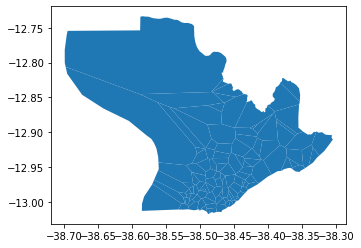

In [ ]:
voronoi.plot()

In [ ]:
ele22 = voronoi.sjoin(comb_sel)

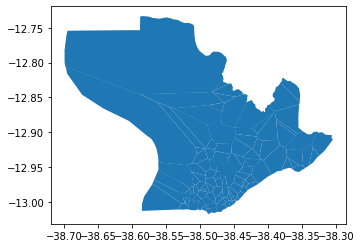

In [ ]:
ele22.plot()

In [ ]:
zonas = ele22.dissolve(by='ZONA', as_index=False)

In [ ]:
zonas.hape

AttributeError: ignored

In [ ]:
zonas.shape

(19, 13)

In [ ]:
from IPython.utils import encoding
zonas.to_file('gdrive/MyDrive/zonas_ssa.shp', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


# New Section